# Análise de Depressão em Estudantes - Um Estudo Completo de Ciência de Dados

## 📦 Importação de Bibliotecas e Configuração


In [5]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Bibliotecas para machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

# Bibliotecas para pré-processamento
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configurações gerais
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## 📊 Carregamento e Primeira Exploração dos Dados

In [6]:
# Carregamento do dataset
df = pd.read_csv('student_depression_dataset.csv')

print("=== INFORMAÇÕES BÁSICAS DO DATASET ===")
print(f"Dimensões: {df.shape}")
print(f"Colunas: {list(df.columns)}")
print("\n=== INFO DETALHADA ===")
print(df.info())

print("\n=== PRIMEIROS 5 REGISTROS ===")
display(df.head())

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
display(df.describe())

=== INFORMAÇÕES BÁSICAS DO DATASET ===
Dimensões: (27901, 18)
Colunas: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']

=== INFO DETALHADA ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Acad

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0



=== ESTATÍSTICAS DESCRITIVAS ===


,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


### Análise da Estrutura dos Dados

In [7]:
# Identificar tipos de variáveis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variáveis Numéricas:", numeric_cols)
print("Variáveis Categóricas:", categorical_cols)

# Verificar valores únicos em variáveis categóricas
print("\n=== VALORES ÚNICOS EM VARIÁVEIS CATEGÓRICAS ===")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(f"Valores: {df[col].unique()[:10]}")  # Mostrar apenas os primeiros 10
    print("-" * 50)

Variáveis Numéricas: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']
Variáveis Categóricas: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']

=== VALORES ÚNICOS EM VARIÁVEIS CATEGÓRICAS ===
Gender: 2 valores únicos
Valores: ['Male' 'Female']
--------------------------------------------------
City: 52 valores únicos
Valores: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik']
--------------------------------------------------
Profession: 14 valores únicos
Valores: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef']
--------------------------------------------------
Sleep Duration: 5 valores únicos
Valores: ["'5-6 hours'

## 🧹 Pré-processamento e Limpeza dos Dados

### Análise de Valores Ausentes

=== ANÁLISE DE VALORES AUSENTES ===


,Coluna,Valores Ausentes,Percentual


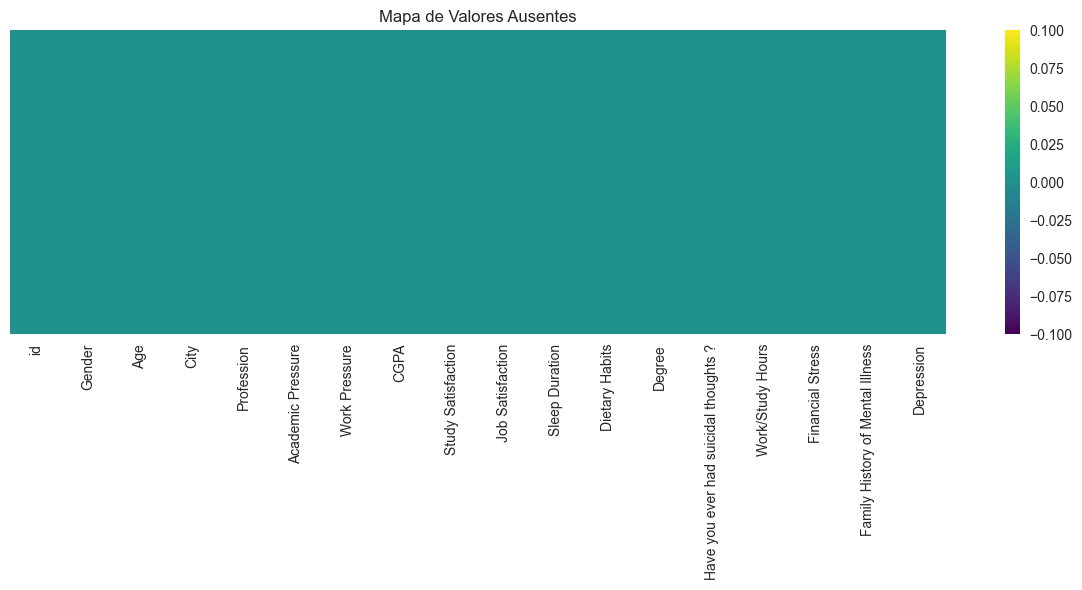

In [8]:
# Verificar valores ausentes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Coluna': missing_data.index,
    'Valores Ausentes': missing_data.values,
    'Percentual': missing_percent.values
}).sort_values('Percentual', ascending=False)

print("=== ANÁLISE DE VALORES AUSENTES ===")
display(missing_df[missing_df['Valores Ausentes'] > 0])

# Visualização de valores ausentes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Mapa de Valores Ausentes')
plt.tight_layout()
plt.show()

### Tratamento de Valores Ausentes e Outliers

In [9]:
# Primeiro, vamos verificar e limpar a coluna Sleep Duration se necessário
print("Valores únicos em Sleep Duration:", df['Sleep Duration'].unique())

# Limpeza da coluna Sleep Duration apenas se for string
if df['Sleep Duration'].dtype == 'object':
    df['Sleep Duration'] = df['Sleep Duration'].astype(str).str.replace("'", "")
    print("Sleep Duration após limpeza:", df['Sleep Duration'].unique())

# Análise de outliers em variáveis numéricas
def detect_outliers(df, columns):
    outliers_info = {}
    
    for col in columns:
        if col in df.columns and df[col].dtype in ['int64', 'float64']:
            # Remover valores nulos antes do cálculo
            col_data = df[col].dropna()
            
            if len(col_data) > 0:
                Q1 = col_data.quantile(0.25)
                Q3 = col_data.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
                outliers_info[col] = {
                    'count': len(outliers),
                    'percentage': (len(outliers) / len(col_data)) * 100,
                    'bounds': (lower_bound, upper_bound),
                    'min': col_data.min(),
                    'max': col_data.max()
                }
            else:
                outliers_info[col] = {'count': 0, 'percentage': 0, 'bounds': (0, 0)}
    
    return outliers_info

# Verificar quais colunas são realmente numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'id' in numeric_columns:
    numeric_columns.remove('id')
if 'Depression' in numeric_columns:
    numeric_columns.remove('Depression')

print("Colunas numéricas identificadas:", numeric_columns)

outliers_info = detect_outliers(df, numeric_columns)

print("\n=== ANÁLISE DE OUTLIERS ===")
for col, info in outliers_info.items():
    if info['count'] > 0:
        print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%) - Range: [{info['min']:.2f}, {info['max']:.2f}]")
    else:
        print(f"{col}: Nenhum outlier detectado")

Valores únicos em Sleep Duration: ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
Sleep Duration após limpeza: ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Colunas numéricas identificadas: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']

=== ANÁLISE DE OUTLIERS ===
Age: 12 outliers (0.04%) - Range: [18.00, 59.00]
Academic Pressure: Nenhum outlier detectado
Work Pressure: 3 outliers (0.01%) - Range: [0.00, 5.00]
CGPA: 9 outliers (0.03%) - Range: [0.00, 10.00]
Study Satisfaction: Nenhum outlier detectado
Job Satisfaction: 8 outliers (0.03%) - Range: [0.00, 4.00]
Work/Study Hours: Nenhum outlier detectado


### Tratamento da Variável Target

=== ANÁLISE DA VARIÁVEL TARGET (Depression) ===
Distribuição:
Depression
1    16336
0    11565
Name: count, dtype: int64

Proporção:
Classe 1: 16336 (58.55%)
Classe 0: 11565 (41.45%)


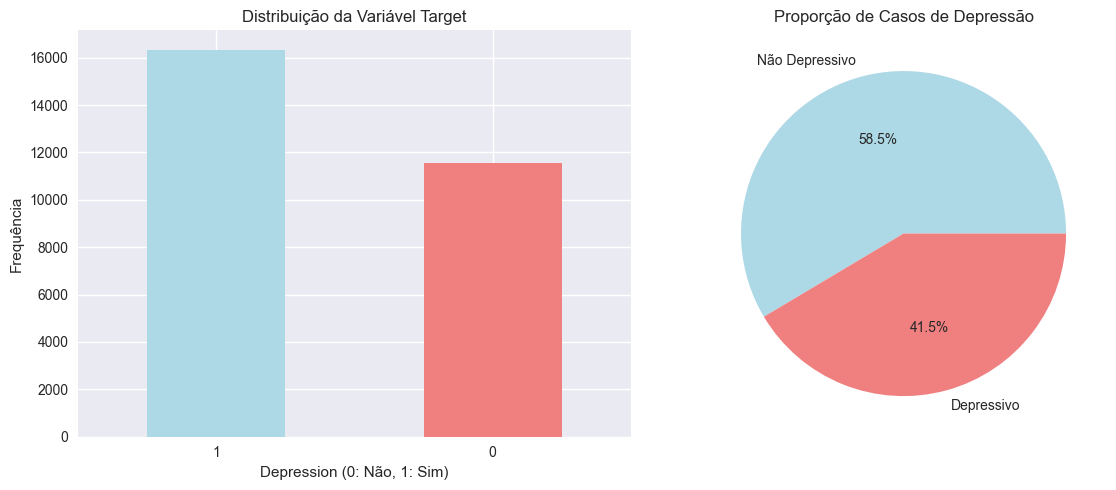

In [10]:
# Análise da variável target
print("=== ANÁLISE DA VARIÁVEL TARGET (Depression) ===")
target_dist = df['Depression'].value_counts()
print("Distribuição:")
print(target_dist)
print(f"\nProporção:")
for value, count in target_dist.items():
    print(f"Classe {value}: {count} ({count/len(df)*100:.2f}%)")

# Visualização da distribuição da variável target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras
target_dist.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Distribuição da Variável Target')
ax1.set_xlabel('Depression (0: Não, 1: Sim)')
ax1.set_ylabel('Frequência')
ax1.tick_params(axis='x', rotation=0)

# Gráfico de pizza
ax2.pie(target_dist.values, labels=['Não Depressivo', 'Depressivo'], 
        autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
ax2.set_title('Proporção de Casos de Depressão')

plt.tight_layout()
plt.show()

## 📈 Análise Exploratória de Dados (EDA)

### Análise Univariada

Colunas numéricas para análise: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


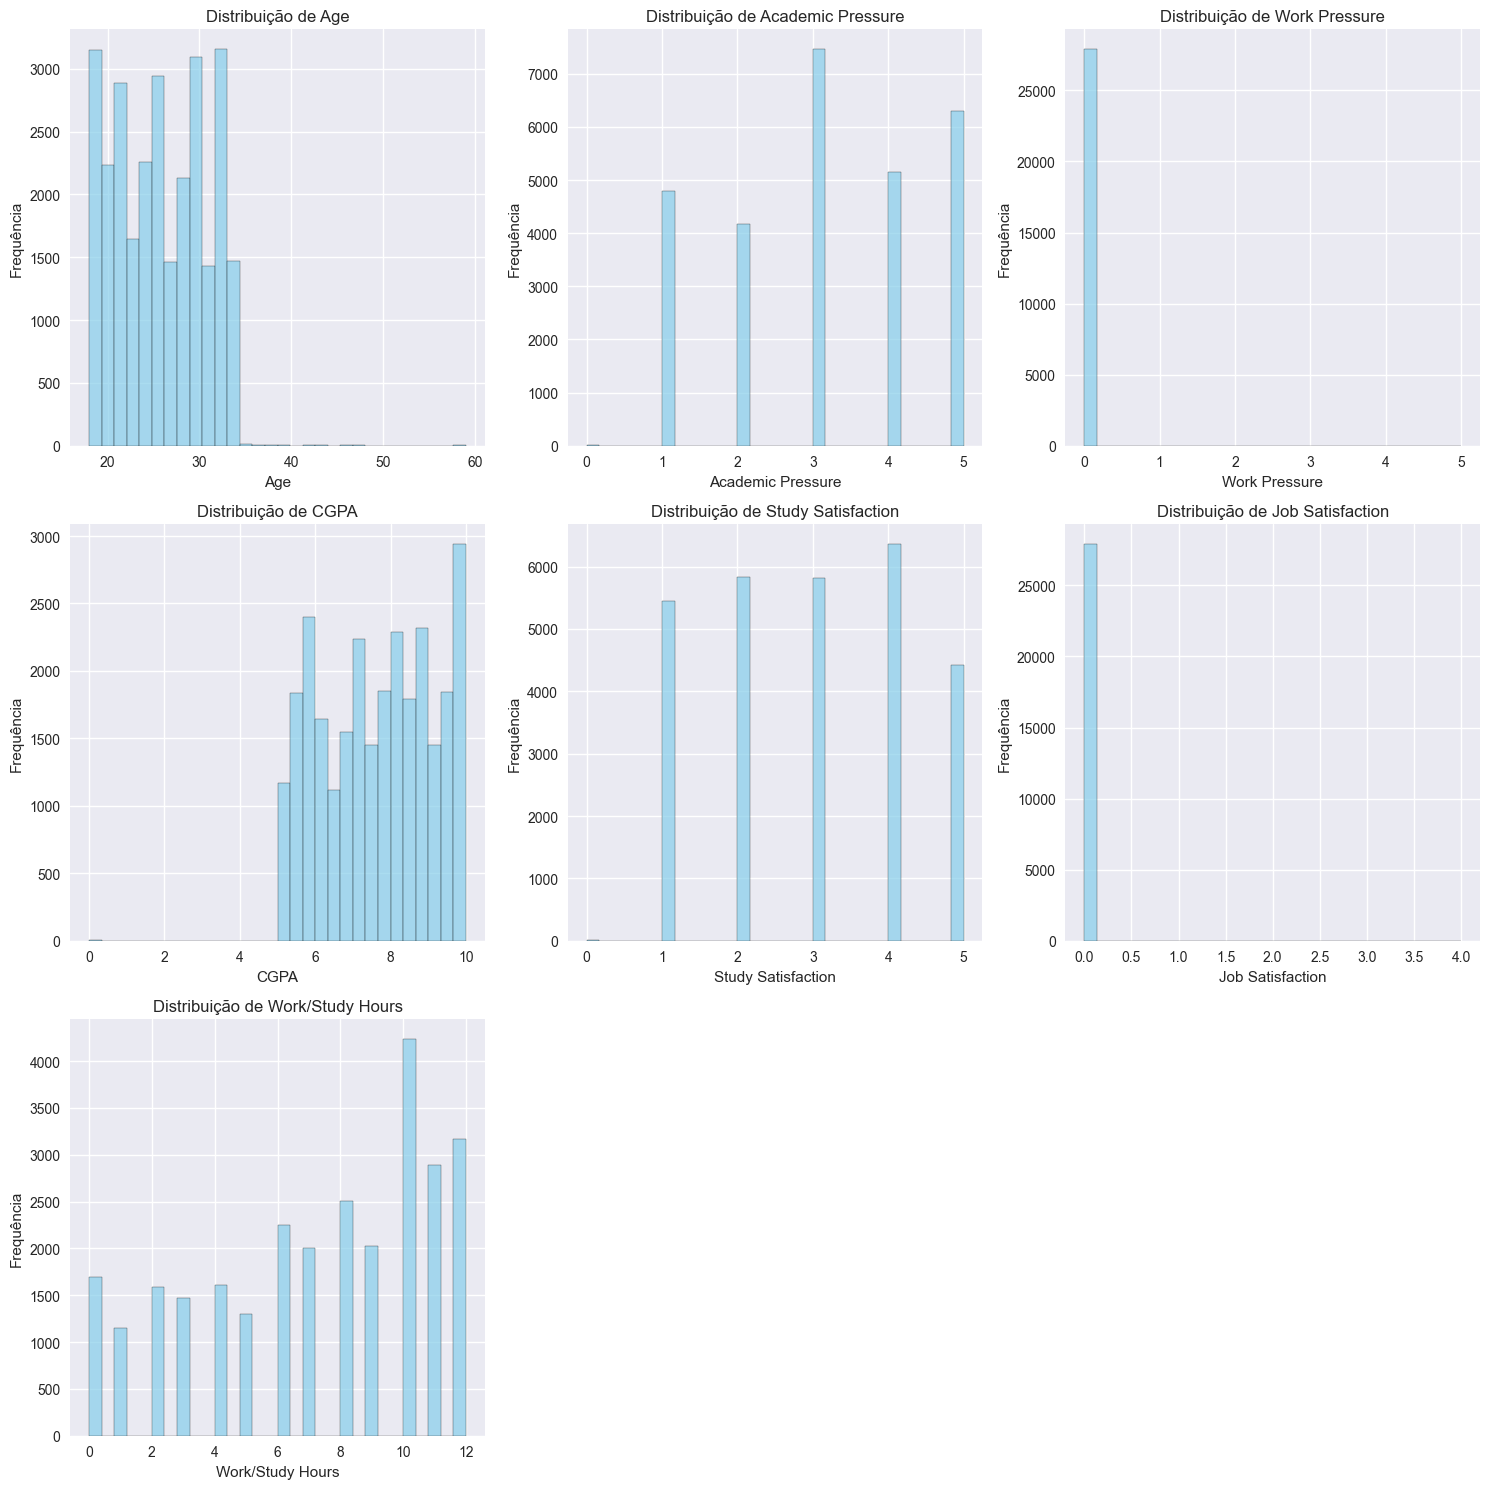

In [11]:
# Identificar colunas numéricas automaticamente
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Remover colunas não relevantes para visualização
if 'id' in numeric_cols:
    numeric_cols.remove('id')
if 'Depression' in numeric_cols:
    numeric_cols.remove('Depression')

print("Colunas numéricas para análise:", numeric_cols)

# Análise de variáveis numéricas
if len(numeric_cols) > 0:
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.ravel()
    
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            axes[i].hist(df[col].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
            axes[i].set_title(f'Distribuição de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequência')
    
    # Remover subplots vazios
    for i in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma coluna numérica encontrada para visualização.")

Colunas categóricas encontradas: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']


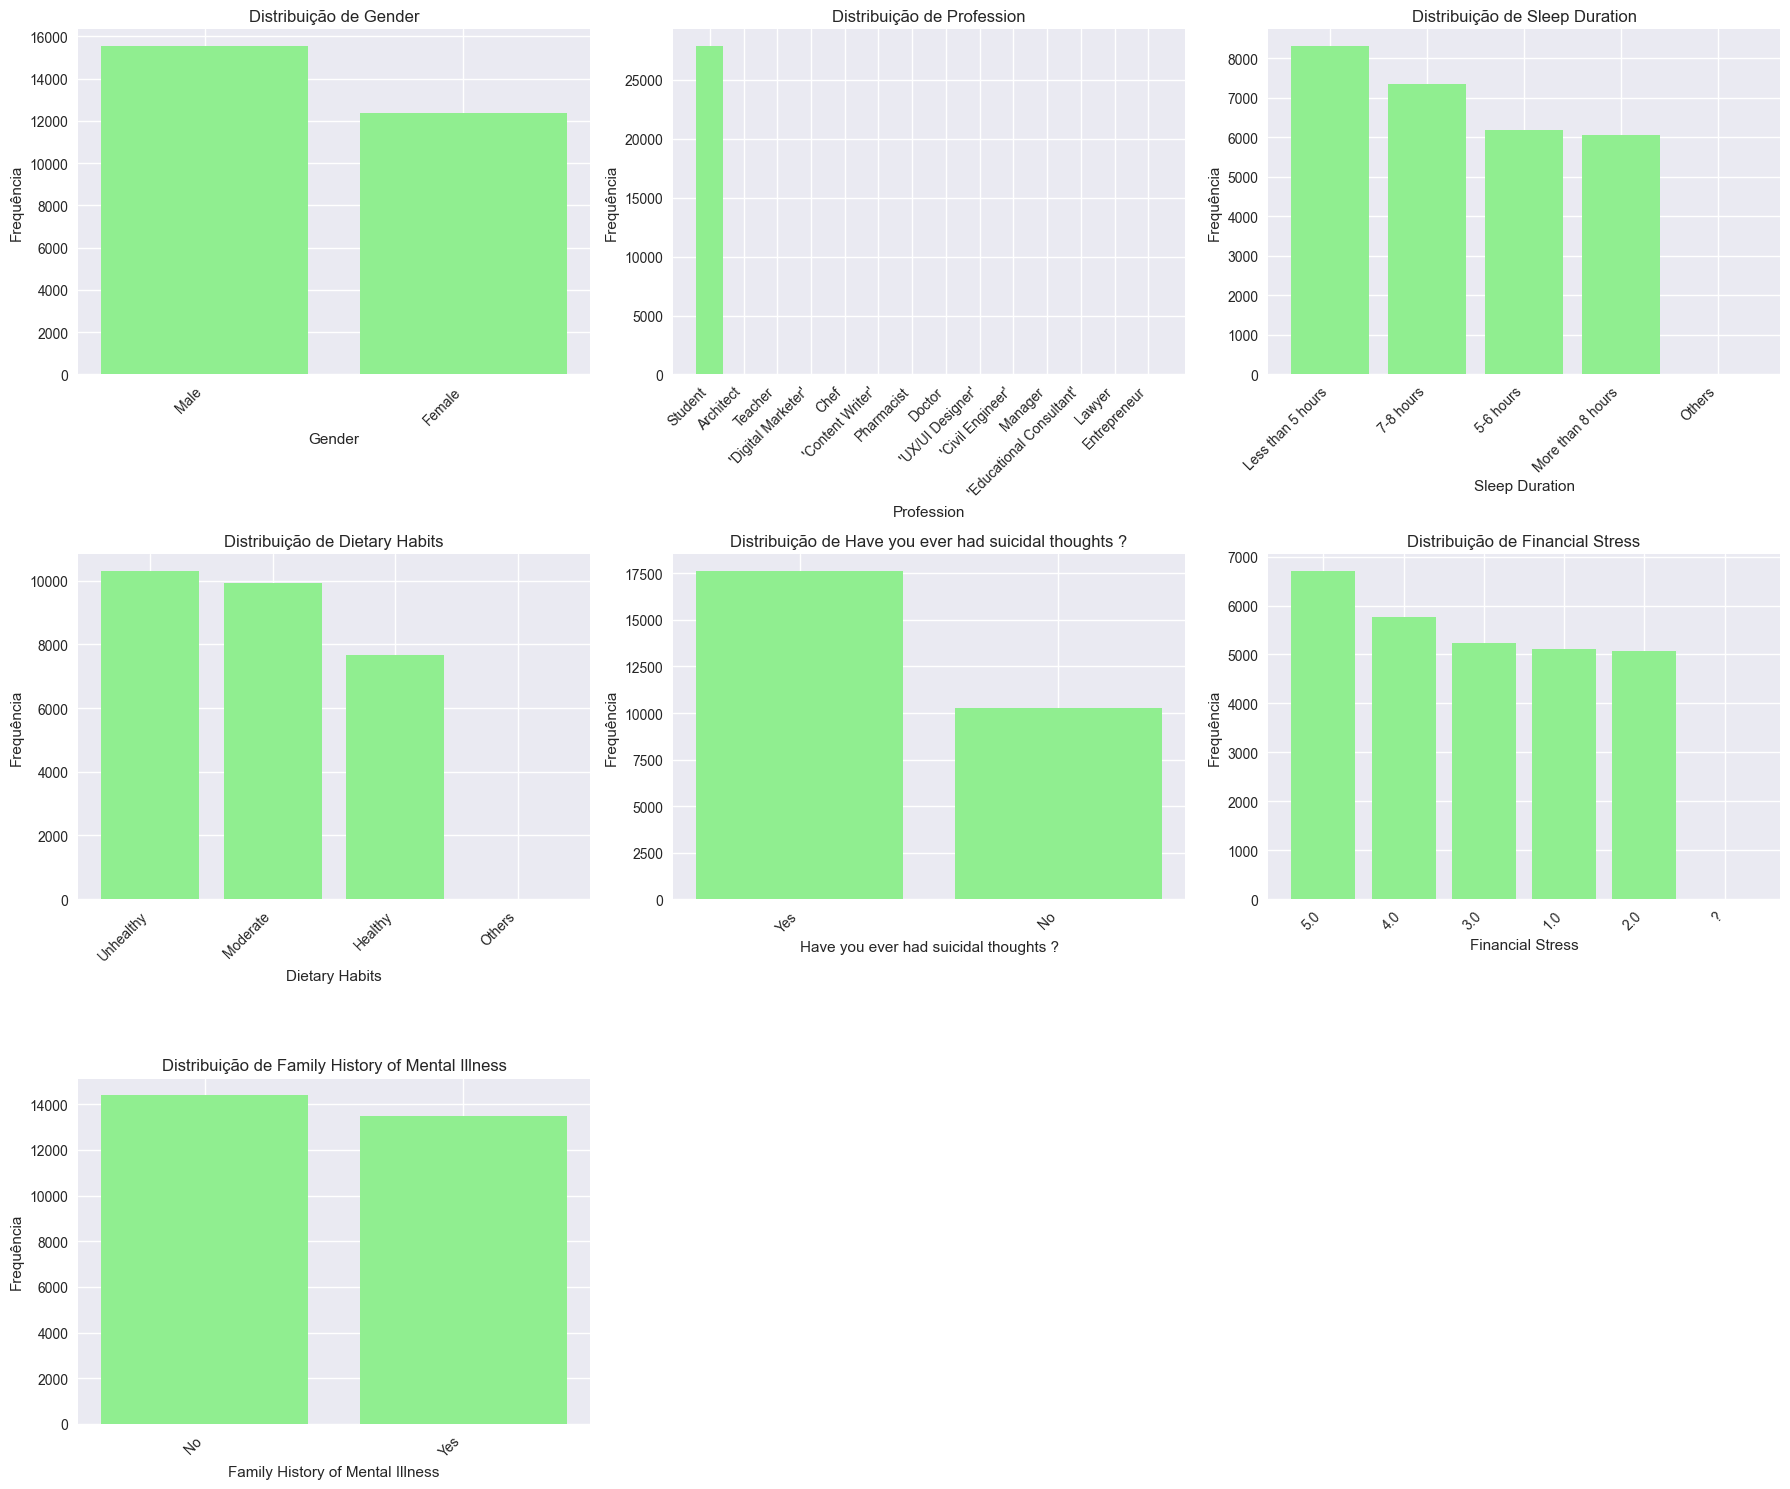

In [12]:
# Análise de variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Colunas categóricas encontradas:", categorical_cols)

# Filtrar apenas colunas que existem e são relevantes
categorical_cols_to_plot = [col for col in categorical_cols if col in df.columns and df[col].nunique() < 20]

if len(categorical_cols_to_plot) > 0:
    n_cols = min(3, len(categorical_cols_to_plot))
    n_rows = (len(categorical_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.ravel()

    for i, col in enumerate(categorical_cols_to_plot):
        if i < len(axes):
            value_counts = df[col].value_counts()
            axes[i].bar(range(len(value_counts)), value_counts.values, color='lightgreen')
            axes[i].set_title(f'Distribuição de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequência')
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Remover subplots vazios
    for i in range(len(categorical_cols_to_plot), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma coluna categórica adequada para visualização.")

### Análise Bivariada - Relação com a Variável Target

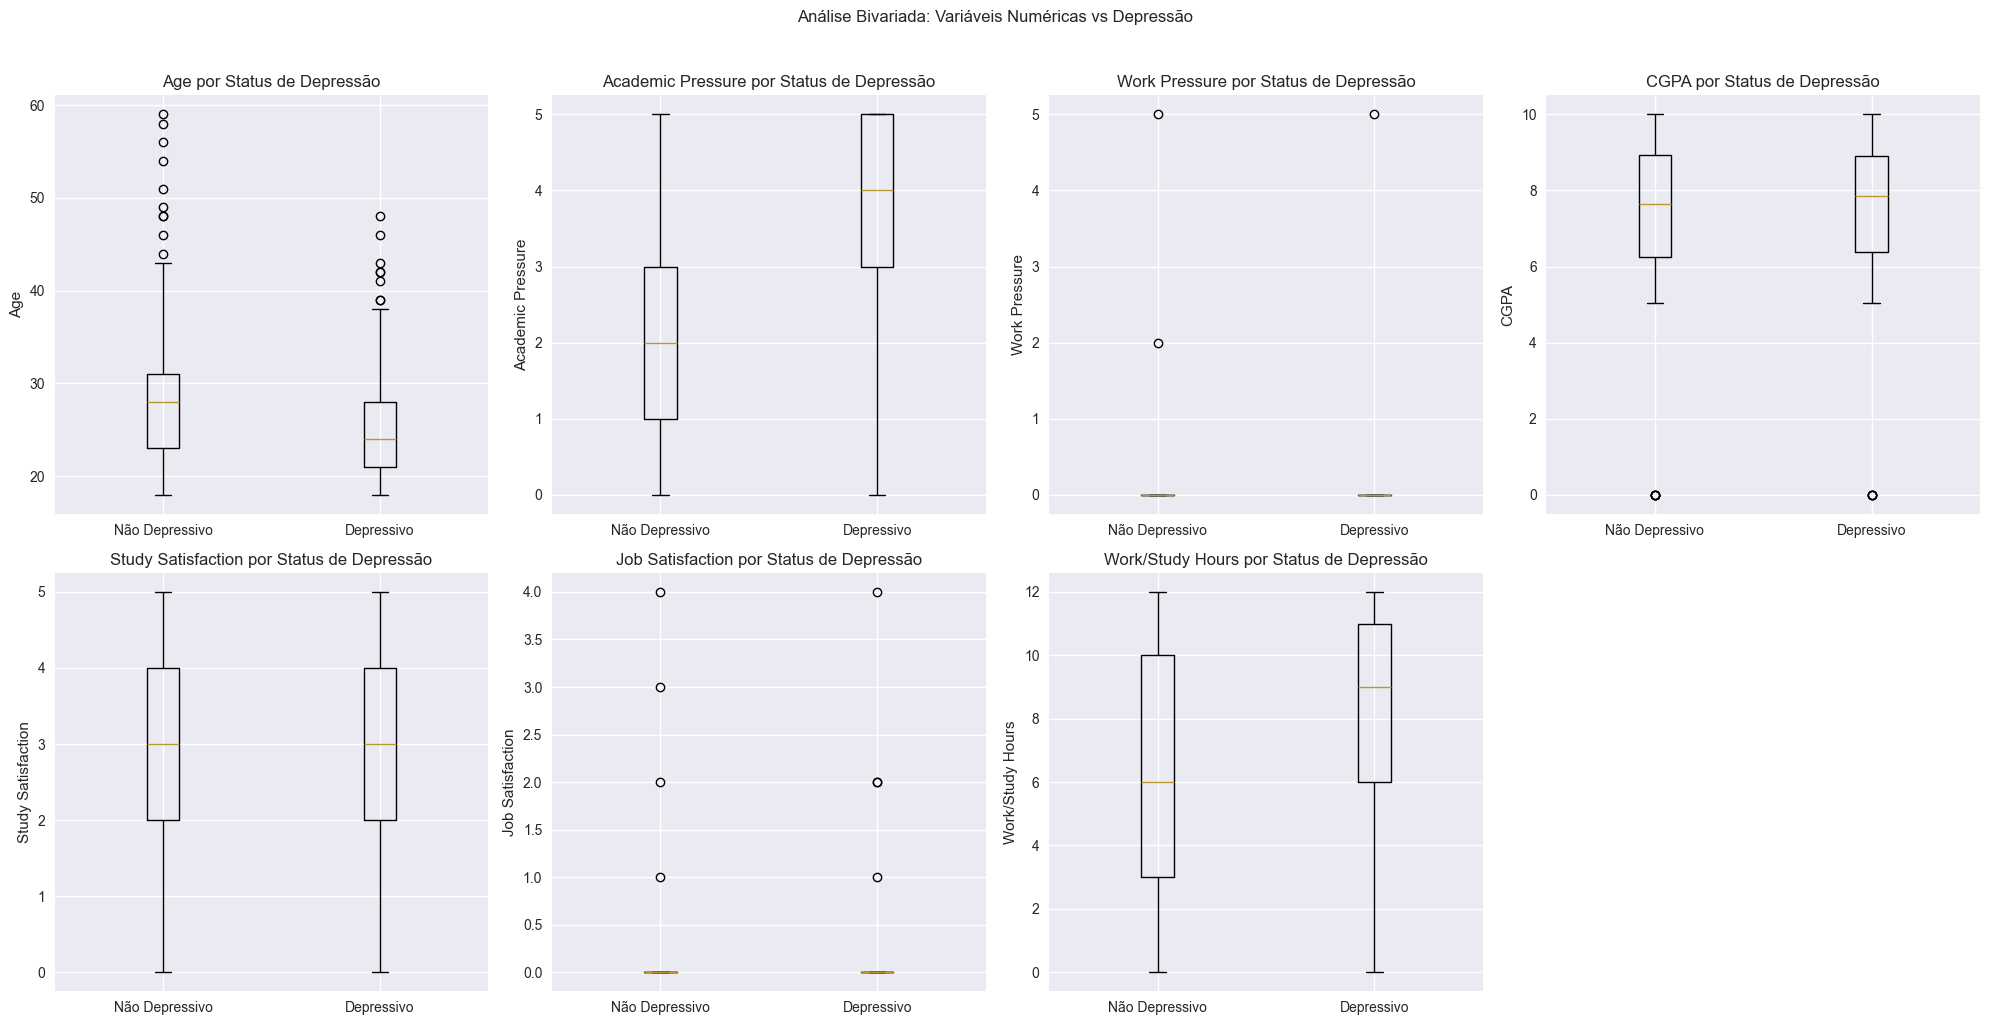

In [13]:
# Garantir que temos a variável target
if 'Depression' not in df.columns:
    print("ERRO: Coluna 'Depression' não encontrada no dataset!")
else:
    # Análise da relação entre variáveis numéricas e depressão
    numeric_cols_clean = [col for col in numeric_cols if col in df.columns]
    
    if len(numeric_cols_clean) > 0:
        n_cols = min(4, len(numeric_cols_clean))
        n_rows = (len(numeric_cols_clean) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
        if n_rows == 1 and n_cols == 1:
            axes = [axes]
        elif n_rows == 1:
            axes = axes
        else:
            axes = axes.ravel()
        
        for i, col in enumerate(numeric_cols_clean):
            if i < len(axes):
                try:
                    # Criar boxplot comparando distribuições por status de depressão
                    data_for_plot = df[[col, 'Depression']].dropna()
                    
                    depression_0 = data_for_plot[data_for_plot['Depression'] == 0][col]
                    depression_1 = data_for_plot[data_for_plot['Depression'] == 1][col]
                    
                    axes[i].boxplot([depression_0, depression_1], labels=['Não Depressivo', 'Depressivo'])
                    axes[i].set_title(f'{col} por Status de Depressão')
                    axes[i].set_ylabel(col)
                    
                except Exception as e:
                    print(f"Erro ao plotar {col}: {e}")
                    axes[i].text(0.5, 0.5, f'Erro: {col}', transform=axes[i].transAxes, ha='center')
        
        # Remover subplots vazios
        for i in range(len(numeric_cols_clean), len(axes)):
            fig.delaxes(axes[i])
        
        plt.suptitle('Análise Bivariada: Variáveis Numéricas vs Depressão', y=1.02)
        plt.tight_layout()
        plt.show()
    else:
        print("Nenhuma coluna numérica disponível para análise bivariada.")

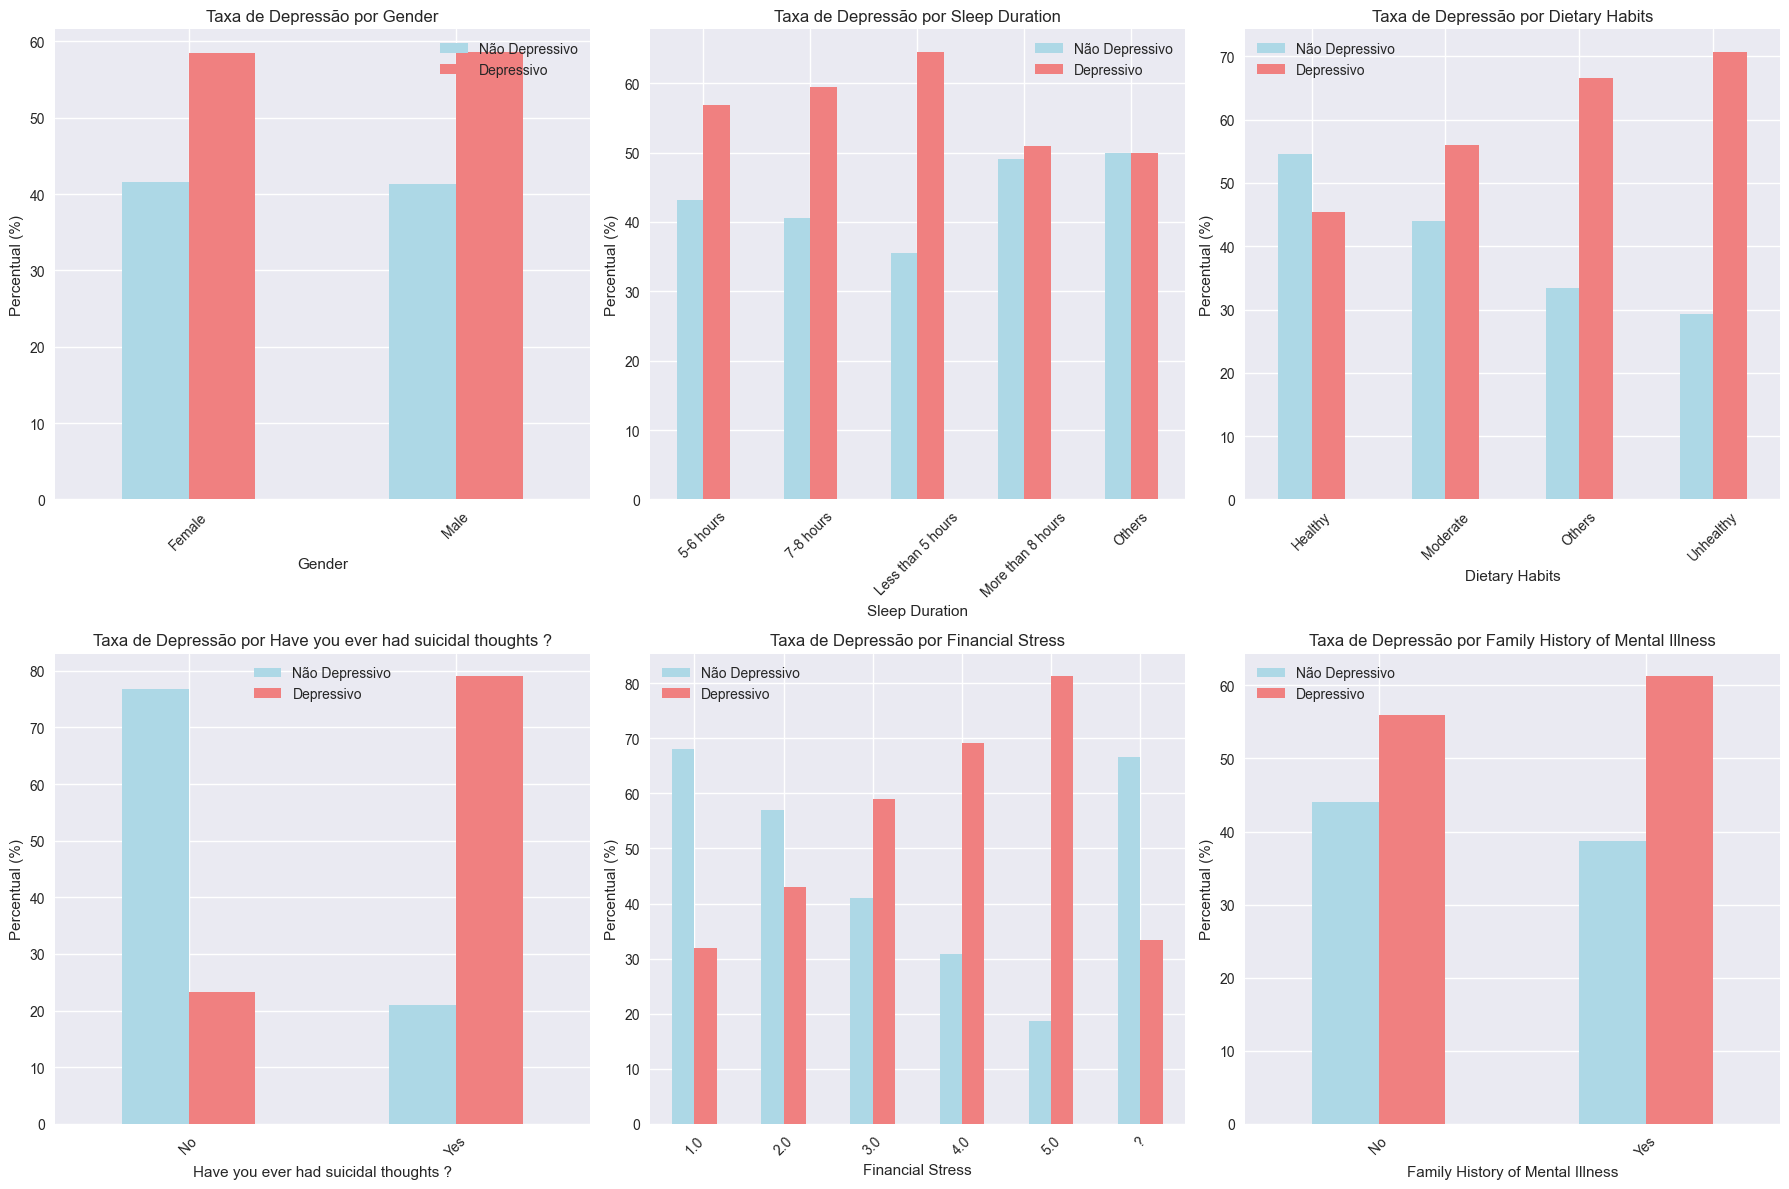

In [14]:
# Análise de variáveis categóricas vs Depressão
categorical_analysis = [col for col in categorical_cols if col in df.columns and df[col].nunique() < 10]

if len(categorical_analysis) > 0 and 'Depression' in df.columns:
    n_cols = min(3, len(categorical_analysis))
    n_rows = (len(categorical_analysis) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.ravel()

    for i, col in enumerate(categorical_analysis):
        if i < len(axes):
            try:
                # Crosstab para análise de proporções
                ct = pd.crosstab(df[col], df['Depression'], normalize='index') * 100
                ct.plot(kind='bar', ax=axes[i], color=['lightblue', 'lightcoral'])
                axes[i].set_title(f'Taxa de Depressão por {col}')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Percentual (%)')
                axes[i].legend(['Não Depressivo', 'Depressivo'])
                axes[i].tick_params(axis='x', rotation=45)
                
            except Exception as e:
                print(f"Erro ao analisar {col}: {e}")
                axes[i].text(0.5, 0.5, f'Erro: {col}', transform=axes[i].transAxes, ha='center')

    # Remover subplots vazios
    for i in range(len(categorical_analysis), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()
else:
    print("Variáveis categóricas não disponíveis para análise ou muitas categorias únicas.")

### Matriz de Correlação

=== PREPARANDO DADOS PARA CORRELAÇÃO ===
Colunas numéricas disponíveis: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']
✓ Variável target 'Depression' encontrada
✓ Codificado: Gender
✓ Codificado: Sleep Duration
✓ Codificado: Dietary Habits
✓ Codificado: Family History of Mental Illness
✓ Codificado: Have you ever had suicidal thoughts ?
Colunas finais para correlação: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression', 'Gender_encoded', 'Sleep Duration_encoded', 'Dietary Habits_encoded', 'Family History of Mental Illness_encoded', 'Have you ever had suicidal thoughts ?_encoded']


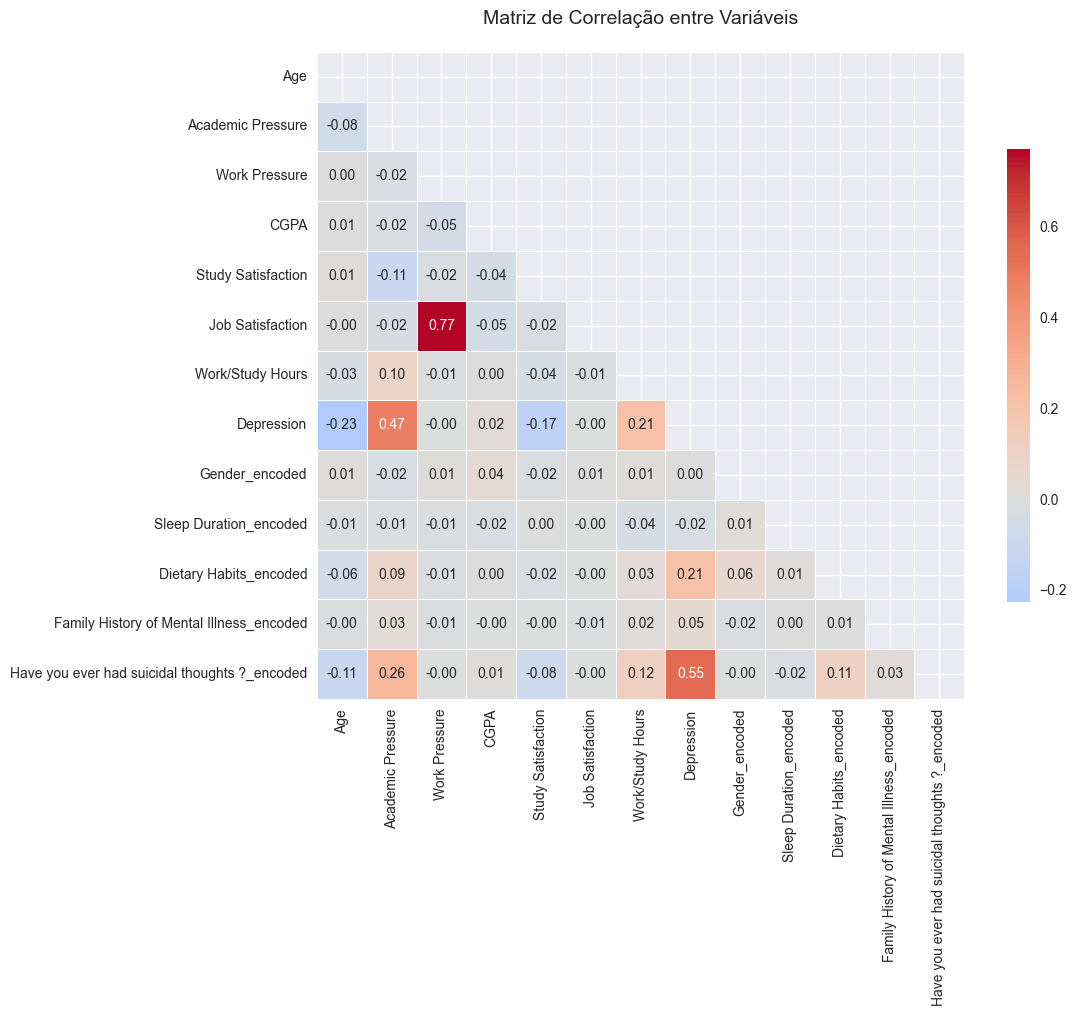


=== CORRELAÇÕES MAIS FORTES COM DEPRESSÃO ===
Variável                              Correlação
--------------------------------------------------
Have you ever had suicidal thoughts    0.546
Academic Pressure                      0.475
Age                                    0.226
Work/Study Hours                       0.209
Dietary Habits_encoded                 0.207
Study Satisfaction                     0.168
Family History of Mental Illness_en    0.053
Sleep Duration_encoded                 0.022
CGPA                                   0.022
Job Satisfaction                       0.003
Work Pressure                          0.003
Gender_encoded                         0.002


In [15]:
# Preparar dados para correlação de forma mais robusta
df_corr = df.copy()

print("=== PREPARANDO DADOS PARA CORRELAÇÃO ===")

# Primeiro, identificar todas as colunas numéricas existentes
numeric_cols_available = df_corr.select_dtypes(include=[np.number]).columns.tolist()
print(f"Colunas numéricas disponíveis: {numeric_cols_available}")

# Remover id se existir
if 'id' in numeric_cols_available:
    numeric_cols_available.remove('id')

# Verificar se Depression existe
if 'Depression' not in df_corr.columns:
    print("AVISO: Coluna 'Depression' não encontrada!")
else:
    print("✓ Variável target 'Depression' encontrada")

# Codificar variáveis categóricas de forma mais segura
categorical_for_corr = ['Gender', 'Sleep Duration', 'Dietary Habits', 
                       'Family History of Mental Illness', 'Have you ever had suicidal thoughts ?']

le = LabelEncoder()
encoded_cols = []

for col in categorical_for_corr:
    if col in df_corr.columns:
        try:
            # Converter para string e tratar valores ausentes
            col_data = df_corr[col].astype(str).fillna('missing')
            df_corr[col + '_encoded'] = le.fit_transform(col_data)
            encoded_cols.append(col + '_encoded')
            print(f"✓ Codificado: {col}")
        except Exception as e:
            print(f"✗ Erro ao codificar {col}: {e}")

# Combinar colunas para correlação
corr_cols = numeric_cols_available + encoded_cols

# Verificar se todas as colunas existem
corr_cols_available = [col for col in corr_cols if col in df_corr.columns]
print(f"Colunas finais para correlação: {corr_cols_available}")

if len(corr_cols_available) < 2:
    print("ERRO: Não há colunas suficientes para calcular correlação")
else:
    try:
        # Calcular matriz de correlação apenas com colunas válidas
        correlation_data = df_corr[corr_cols_available]
        
        # Verificar e tratar valores não numéricos
        for col in correlation_data.columns:
            if correlation_data[col].dtype == 'object':
                print(f"AVISO: Coluna {col} ainda contém dados não numéricos. Convertendo...")
                correlation_data[col] = pd.to_numeric(correlation_data[col], errors='coerce')
        
        # Calcular correlação
        correlation_matrix = correlation_data.corr()
        
        # Plotar matriz de correlação
        plt.figure(figsize=(12, 10))
        
        # Criar máscara para a parte superior
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        
        # Criar heatmap
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                   center=0, square=True, linewidths=0.5, 
                   cbar_kws={"shrink": 0.7}, fmt='.2f')
        plt.title('Matriz de Correlação entre Variáveis', fontsize=14, pad=20)
        plt.tight_layout()
        plt.show()
        
        # Correlações mais fortes com a variável target (se existir)
        if 'Depression' in correlation_matrix.columns:
            target_corrs = correlation_matrix['Depression'].abs().sort_values(ascending=False)
            print("\n=== CORRELAÇÕES MAIS FORTES COM DEPRESSÃO ===")
            print("Variável                              Correlação")
            print("-" * 50)
            for var, corr in target_corrs.items():
                if var != 'Depression' and not pd.isna(corr):
                    print(f"{var[:35]:<35} {corr:>8.3f}")
        else:
            print("AVISO: Não foi possível analisar correlações com 'Depression'")
            
    except Exception as e:
        print(f"ERRO ao calcular correlação: {e}")
        print("Tentando abordagem alternativa...")
        
        # Abordagem alternativa: apenas variáveis numéricas originais
        numeric_only = df_corr.select_dtypes(include=[np.number])
        if len(numeric_only.columns) > 1:
            correlation_matrix_simple = numeric_only.corr()
            
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix_simple, annot=True, cmap='coolwarm', 
                       center=0, square=True, linewidths=0.5, fmt='.2f')
            plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14)
            plt.tight_layout()
            plt.show()
            
            if 'Depression' in correlation_matrix_simple.columns:
                target_corrs_simple = correlation_matrix_simple['Depression'].abs().sort_values(ascending=False)
                print("\n=== CORRELAÇÕES (APENAS NUMÉRICAS) ===")
                for var, corr in target_corrs_simple.items():
                    if var != 'Depression':
                        print(f"{var}: {corr:.3f}")

### Insights Preliminares

In [16]:
print("=== INSIGHTS PRELIMINARES DA ANÁLISE EXPLORATÓRIA ===")
print()

# Análise por gênero
gender_depression = pd.crosstab(df['Gender'], df['Depression'], normalize='index') * 100
print("1. ANÁLISE POR GÊNERO:")
for gender in gender_depression.index:
    rate = gender_depression.loc[gender, 1]
    print(f"   - {gender}: {rate:.1f}% de taxa de depressão")

print()

# Análise por pensamentos suicidas
if 'Have you ever had suicidal thoughts ?' in df.columns:
    suicidal_depression = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'], normalize='index') * 100
    print("2. ANÁLISE POR PENSAMENTOS SUICIDAS:")
    for thought in suicidal_depression.index:
        rate = suicidal_depression.loc[thought, 1]
        print(f"   - {thought}: {rate:.1f}% de taxa de depressão")

print()

# Análise por duração do sono
sleep_depression = pd.crosstab(df['Sleep Duration'], df['Depression'], normalize='index') * 100
print("3. ANÁLISE POR DURAÇÃO DO SONO:")
for sleep in sleep_depression.index:
    rate = sleep_depression.loc[sleep, 1]
    print(f"   - {sleep}: {rate:.1f}% de taxa de depressão")

print()

# Análise por histórico familiar
family_depression = pd.crosstab(df['Family History of Mental Illness'], df['Depression'], normalize='index') * 100
print("4. ANÁLISE POR HISTÓRICO FAMILIAR:")
for family in family_depression.index:
    rate = family_depression.loc[family, 1]
    print(f"   - Histórico familiar {family}: {rate:.1f}% de taxa de depressão")

=== INSIGHTS PRELIMINARES DA ANÁLISE EXPLORATÓRIA ===

1. ANÁLISE POR GÊNERO:
   - Female: 58.5% de taxa de depressão
   - Male: 58.6% de taxa de depressão

2. ANÁLISE POR PENSAMENTOS SUICIDAS:
   - No: 23.2% de taxa de depressão
   - Yes: 79.0% de taxa de depressão

3. ANÁLISE POR DURAÇÃO DO SONO:
   - 5-6 hours: 56.9% de taxa de depressão
   - 7-8 hours: 59.5% de taxa de depressão
   - Less than 5 hours: 64.5% de taxa de depressão
   - More than 8 hours: 50.9% de taxa de depressão
   - Others: 50.0% de taxa de depressão

4. ANÁLISE POR HISTÓRICO FAMILIAR:
   - Histórico familiar No: 56.0% de taxa de depressão
   - Histórico familiar Yes: 61.3% de taxa de depressão


## 🔧 Preparação dos Dados para Modelagem

### Feature Engineering

In [17]:
# Criar novas features baseadas nas análises exploratórias
df_model = df.copy()

# Verificar se as colunas necessárias existem antes de criar features
available_cols = df_model.columns.tolist()
print("Colunas disponíveis:", available_cols)

# 1. Criar feature de alta pressão acadêmica (se a coluna existir)
if 'Academic Pressure' in df_model.columns:
    df_model['High_Academic_Pressure'] = (df_model['Academic Pressure'] >= 4).astype(int)
    print("✓ Feature High_Academic_Pressure criada")

# 2. Criar feature de satisfação geral (se as colunas existirem)
if 'Study Satisfaction' in df_model.columns and 'Job Satisfaction' in df_model.columns:
    df_model['General_Satisfaction'] = (df_model['Study Satisfaction'] + df_model['Job Satisfaction']) / 2
    print("✓ Feature General_Satisfaction criada")
elif 'Study Satisfaction' in df_model.columns:
    df_model['General_Satisfaction'] = df_model['Study Satisfaction']
    print("✓ Feature General_Satisfaction criada (apenas Study Satisfaction)")

# 3. Criar feature de estilo de vida não saudável (se as colunas existirem)
unhealthy_lifestyle = pd.Series(0, index=df_model.index)
if 'Sleep Duration' in df_model.columns:
    unhealthy_lifestyle |= df_model['Sleep Duration'].astype(str).str.contains('Less than 5 hours', na=False)
if 'Dietary Habits' in df_model.columns:
    unhealthy_lifestyle |= (df_model['Dietary Habits'] == 'Unhealthy')

df_model['Unhealthy_Lifestyle'] = unhealthy_lifestyle.astype(int)
print("✓ Feature Unhealthy_Lifestyle criada")

# 4. Criar feature de alto risco (se as colunas existirem)
high_risk = pd.Series(0, index=df_model.index)
if 'Have you ever had suicidal thoughts ?' in df_model.columns:
    high_risk |= (df_model['Have you ever had suicidal thoughts ?'] == 'Yes')
if 'Family History of Mental Illness' in df_model.columns:
    high_risk |= (df_model['Family History of Mental Illness'] == 'Yes')

df_model['High_Risk_Profile'] = high_risk.astype(int)
print("✓ Feature High_Risk_Profile criada")

# 5. Criar feature de carga de trabalho excessiva (se a coluna existir)
if 'Work/Study Hours' in df_model.columns:
    df_model['Excessive_Workload'] = (df_model['Work/Study Hours'] >= 8).astype(int)
    print("✓ Feature Excessive_Workload criada")

print("\n=== NOVAS FEATURES CRIADAS ===")
new_features = ['High_Academic_Pressure', 'General_Satisfaction', 'Unhealthy_Lifestyle', 
               'High_Risk_Profile', 'Excessive_Workload']

for feature in new_features:
    if feature in df_model.columns:
        print(f"{feature}: {df_model[feature].value_counts().to_dict()}")
    else:
        print(f"{feature}: Não criada (colunas originais não disponíveis)")

Colunas disponíveis: ['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
✓ Feature High_Academic_Pressure criada
✓ Feature General_Satisfaction criada
✓ Feature Unhealthy_Lifestyle criada
✓ Feature High_Risk_Profile criada
✓ Feature Excessive_Workload criada

=== NOVAS FEATURES CRIADAS ===
High_Academic_Pressure: {0: 16450, 1: 11451}
General_Satisfaction: {2.0: 6361, 1.0: 5840, 1.5: 5820, 0.5: 5453, 2.5: 4421, 0.0: 4, 3.0: 1, 3.5: 1}
Unhealthy_Lifestyle: {1: 15559, 0: 12342}
High_Risk_Profile: {1: 22438, 0: 5463}
Excessive_Workload: {1: 14833, 0: 13068}


### Preparação Final dos Dados

In [18]:
# Verificar se a variável target existe
if 'Depression' not in df_model.columns:
    print("ERRO: Variável target 'Depression' não encontrada!")
else:
    # Separar features e target
    columns_to_drop = ['Depression']
    if 'id' in df_model.columns:
        columns_to_drop.append('id')
    
    X = df_model.drop(columns_to_drop, axis=1)
    y = df_model['Depression']
    
    # Identificar colunas categóricas e numéricas automaticamente
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    
    # Filtrar colunas que realmente existem
    categorical_features = [col for col in categorical_features if col in X.columns]
    numeric_features = [col for col in numeric_features if col in X.columns]
    
    print("Features categóricas:", categorical_features)
    print("Features numéricas:", numeric_features)
    
    # Verificar features criadas
    created_features = [col for col in ['High_Academic_Pressure', 'General_Satisfaction', 
                                        'Unhealthy_Lifestyle', 'High_Risk_Profile', 'Excessive_Workload'] 
                        if col in X.columns]
    print("Features criadas disponíveis:", created_features)
    
    # Criar pipeline de pré-processamento
    preprocessors = []
    
    if numeric_features:
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        preprocessors.append(('num', numeric_transformer, numeric_features))
    
    if categorical_features:
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
        ])
        preprocessors.append(('cat', categorical_transformer, categorical_features))
    
    if preprocessors:
        preprocessor = ColumnTransformer(
            transformers=preprocessors,
            remainder='passthrough'  # Para manter features que não precisam de processamento
        )
    else:
        print("AVISO: Nenhum preprocessador criado. Usando dados originais.")
        preprocessor = None
    
    print(f"\nShape dos dados: X={X.shape}, y={y.shape}")
    print(f"Distribuição da variável target: {y.value_counts().to_dict()}")
    
    # Verificar balanceamento
    target_balance = y.value_counts(normalize=True)
    print(f"Balanceamento: {target_balance.to_dict()}")

Features categóricas: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
Features numéricas: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'High_Academic_Pressure', 'General_Satisfaction', 'Unhealthy_Lifestyle', 'High_Risk_Profile', 'Excessive_Workload']
Features criadas disponíveis: ['High_Academic_Pressure', 'General_Satisfaction', 'Unhealthy_Lifestyle', 'High_Risk_Profile', 'Excessive_Workload']

Shape dos dados: X=(27901, 21), y=(27901,)
Distribuição da variável target: {1: 16336, 0: 11565}
Balanceamento: {1: 0.5854987276441704, 0: 0.41450127235582956}


## 🤖 Desenvolvimento de Modelos Preditivos

### Divisão dos Dados

In [19]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")
print(f"Distribuição no treino: {y_train.value_counts().to_dict()}")
print(f"Distribuição no teste: {y_test.value_counts().to_dict()}")

Tamanho do conjunto de treino: (22320, 21)
Tamanho do conjunto de teste: (5581, 21)
Distribuição no treino: {1: 13068, 0: 9252}
Distribuição no teste: {1: 3268, 0: 2313}


### Modelo 1: Random Forest

In [20]:
# Pipeline do Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Hiperparâmetros para tunning
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

print("=== TREINAMENTO DO RANDOM FOREST ===")
print("Realizando Grid Search...")

# Grid Search
rf_grid_search = GridSearchCV(
    rf_pipeline, rf_param_grid, cv=5, 
    scoring='roc_auc', n_jobs=-1, verbose=1
)

rf_grid_search.fit(X_train, y_train)

# Melhor modelo
best_rf = rf_grid_search.best_estimator_

print(f"Melhores parâmetros: {rf_grid_search.best_params_}")
print(f"Melhor score CV: {rf_grid_search.best_score_:.4f}")

# Predições
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)
rf_train_proba = best_rf.predict_proba(X_train)[:, 1]
rf_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Métricas
print("\n=== RESULTADOS RANDOM FOREST ===")
print("TREINO:")
print(f"AUC Score: {roc_auc_score(y_train, rf_train_proba):.4f}")
print(f"Accuracy: {best_rf.score(X_train, y_train):.4f}")

print("\nTESTE:")
print(f"AUC Score: {roc_auc_score(y_test, rf_test_proba):.4f}")
print(f"Accuracy: {best_rf.score(X_test, y_test):.4f}")

print("\nClassification Report (Teste):")
print(classification_report(y_test, rf_test_pred))

=== TREINAMENTO DO RANDOM FOREST ===
Realizando Grid Search...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Melhores parâmetros: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 300}
Melhor score CV: 0.9148

=== RESULTADOS RANDOM FOREST ===
TREINO:
AUC Score: 0.9564
Accuracy: 0.8824

TESTE:
AUC Score: 0.9148
Accuracy: 0.8389

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2313
           1       0.85      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



### Modelo 2: Rede Neural (MLP)

In [21]:
# Pipeline da Rede Neural
mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(random_state=42, max_iter=1000))
])

# Hiperparâmetros para tunning
mlp_param_grid = {
    'classifier__hidden_layer_sizes': [(20,), (10, 10), (5, 10 , 20)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__solver': ['adam', 'lbfgs'],
    'classifier__alpha': [0.001, 0.01],
    'classifier__learning_rate': ['constant', 'adaptive']
}

print("=== TREINAMENTO DA REDE NEURAL ===")
print("Realizando Grid Search...")

# Grid Search
mlp_grid_search = GridSearchCV(
    mlp_pipeline, mlp_param_grid, cv=5, 
    scoring='roc_auc', n_jobs=-1, verbose=1
)

mlp_grid_search.fit(X_train, y_train)

# Melhor modelo
best_mlp = mlp_grid_search.best_estimator_

print(f"Melhores parâmetros: {mlp_grid_search.best_params_}")
print(f"Melhor score CV: {mlp_grid_search.best_score_:.4f}")

# Predições
mlp_train_pred = best_mlp.predict(X_train)
mlp_test_pred = best_mlp.predict(X_test)
mlp_train_proba = best_mlp.predict_proba(X_train)[:, 1]
mlp_test_proba = best_mlp.predict_proba(X_test)[:, 1]

# Métricas
print("\n=== RESULTADOS REDE NEURAL ===")
print("TREINO:")
print(f"AUC Score: {roc_auc_score(y_train, mlp_train_proba):.4f}")
print(f"Accuracy: {best_mlp.score(X_train, y_train):.4f}")

print("\nTESTE:")
print(f"AUC Score: {roc_auc_score(y_test, mlp_test_proba):.4f}")
print(f"Accuracy: {best_mlp.score(X_test, y_test):.4f}")

print("\nClassification Report (Teste):")
print(classification_report(y_test, mlp_test_pred))

=== TREINAMENTO DA REDE NEURAL ===
Realizando Grid Search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Melhores parâmetros: {'classifier__activation': 'relu', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (5, 10, 20), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}
Melhor score CV: 0.9174

=== RESULTADOS REDE NEURAL ===
TREINO:
AUC Score: 0.9275
Accuracy: 0.8539

TESTE:
AUC Score: 0.9151
Accuracy: 0.8409

Classification Report (Teste):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      2313
           1       0.84      0.89      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



## 📊 Avaliação e Comparação dos Modelos

### Matrizes de Confusão

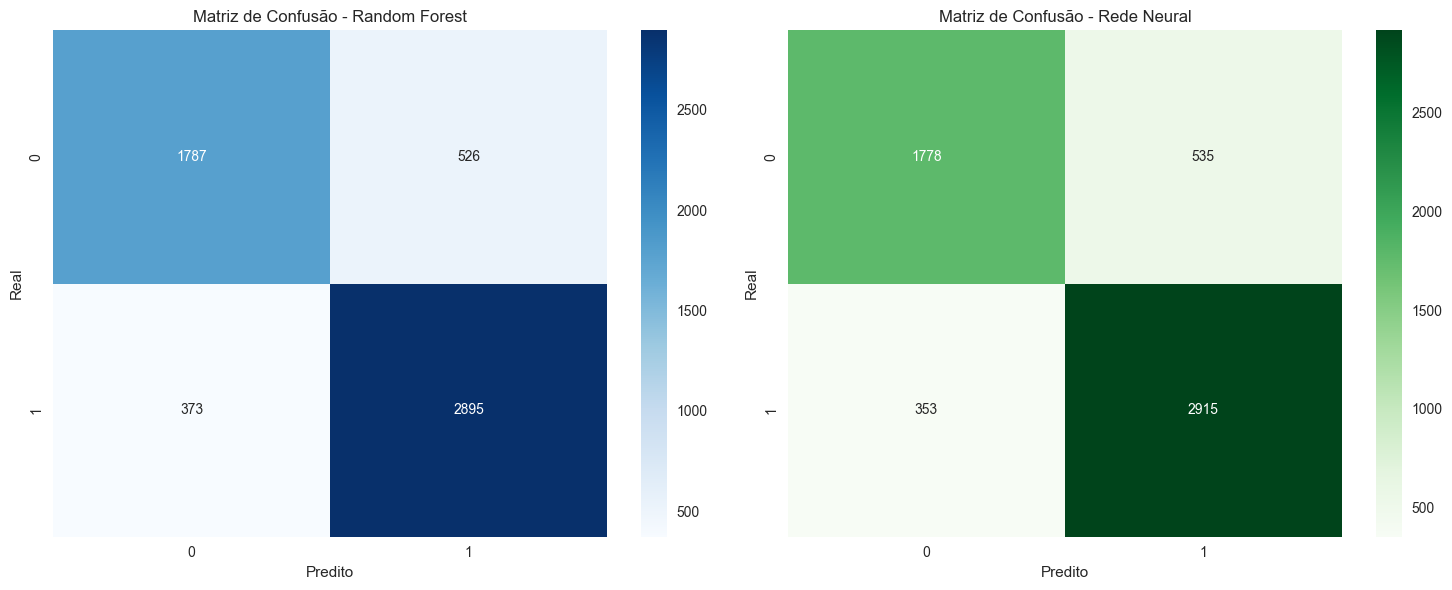

In [22]:
# Plotar matrizes de confusão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Random Forest
cm_rf = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Random Forest')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Rede Neural
cm_mlp = confusion_matrix(y_test, mlp_test_pred)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Rede Neural')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

### Curvas ROC

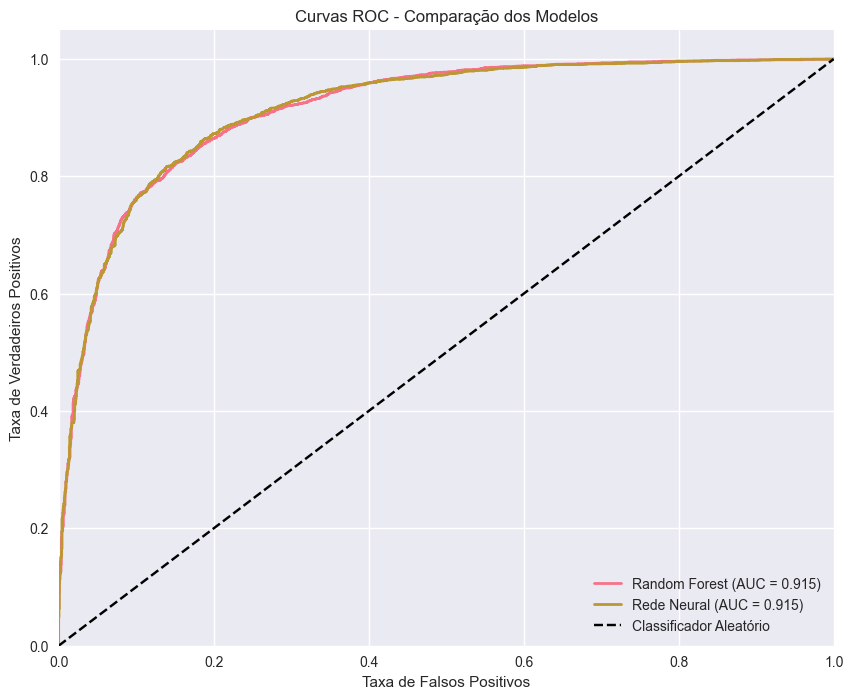

In [23]:
# Plotar curvas ROC
plt.figure(figsize=(10, 8))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_proba)
auc_rf = roc_auc_score(y_test, rf_test_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Rede Neural
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_test_proba)
auc_mlp = roc_auc_score(y_test, mlp_test_proba)
plt.plot(fpr_mlp, tpr_mlp, label=f'Rede Neural (AUC = {auc_mlp:.3f})', linewidth=2)

# Linha de referência
plt.plot([0, 1], [0, 1], 'k--', label='Classificador Aleatório')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC - Comparação dos Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Resumo Comparativo dos Modelos

In [26]:
# Criar tabela comparativa
results_summary = pd.DataFrame({
    'Modelo': ['Random Forest', 'Rede Neural'],
    'AUC_Score_Teste': [roc_auc_score(y_test, rf_test_proba), 
                        roc_auc_score(y_test, mlp_test_proba)],
    'Accuracy_Teste': [best_rf.score(X_test, y_test), 
                       best_mlp.score(X_test, y_test)],
    'AUC_Score_Treino': [roc_auc_score(y_train, rf_train_proba), 
                         roc_auc_score(y_train, mlp_train_proba)],
    'Accuracy_Treino': [best_rf.score(X_train, y_train), 
                        best_mlp.score(X_train, y_train)]
})

results_summary['Overfitting'] = results_summary['AUC_Score_Treino'] - results_summary['AUC_Score_Teste']

print("=== RESUMO COMPARATIVO DOS MODELOS ===")
display(results_summary)

# Determinar melhor modelo
best_model_idx = results_summary['AUC_Score_Teste'].idxmax()
best_model_name = results_summary.loc[best_model_idx, 'Modelo']
best_auc = results_summary.loc[best_model_idx, 'AUC_Score_Teste']

print(f"\n🏆 MELHOR MODELO: {best_model_name} (AUC = {best_auc:.4f})")

=== RESUMO COMPARATIVO DOS MODELOS ===


,Modelo,AUC_Score_Teste,Accuracy_Teste,AUC_Score_Treino,Accuracy_Treino,Overfitting
0,Random Forest,0.914835,0.838918,0.956392,0.882437,0.041557
1,Rede Neural,0.915148,0.840889,0.927484,0.853943,0.012336



🏆 MELHOR MODELO: Rede Neural (AUC = 0.9151)
